In [2]:
# testing rapid art algorithm to check artifact detection
import nipype.algorithms.rapidart as ra  # artifact detection

In [4]:
functional_file = '/home/oad4/scratch60/kpeOutput/fmriprep/sub-1339/ses-1/func/sub-1339_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
parameters_file = '/home/oad4/scratch60/kpeOutput/fmriprep/sub-1339/ses-1/func/sub-1339_ses-1_task-rest_desc-confounds_regressors.tsv'

In [5]:
# methods
def removeVars (confoundFile):
    # this method takes the csv regressors file (from fmriPrep) and chooses a few to confound. You can change those few
    import pandas as pd
    confound = pd.read_csv(confoundFile,sep="\t", na_values="n/a")
    finalConf = confound[['csf', 'white_matter', 'framewise_displacement', 'std_dvars',
                          'a_comp_cor_00', 'a_comp_cor_01',	'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 
                        'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']] # can add 'global_signal' also
     # change NaN of FD to zero
    finalConf = np.array(finalConf)
    finalConf[0,2] = 0
    return finalConf

In [6]:
# save parameters as file
import pandas as pd
import numpy as np
#dataFile = pd.read_csv(parameters_file, sep="\t")
#print(dataFile)
df = removeVars(parameters_file)


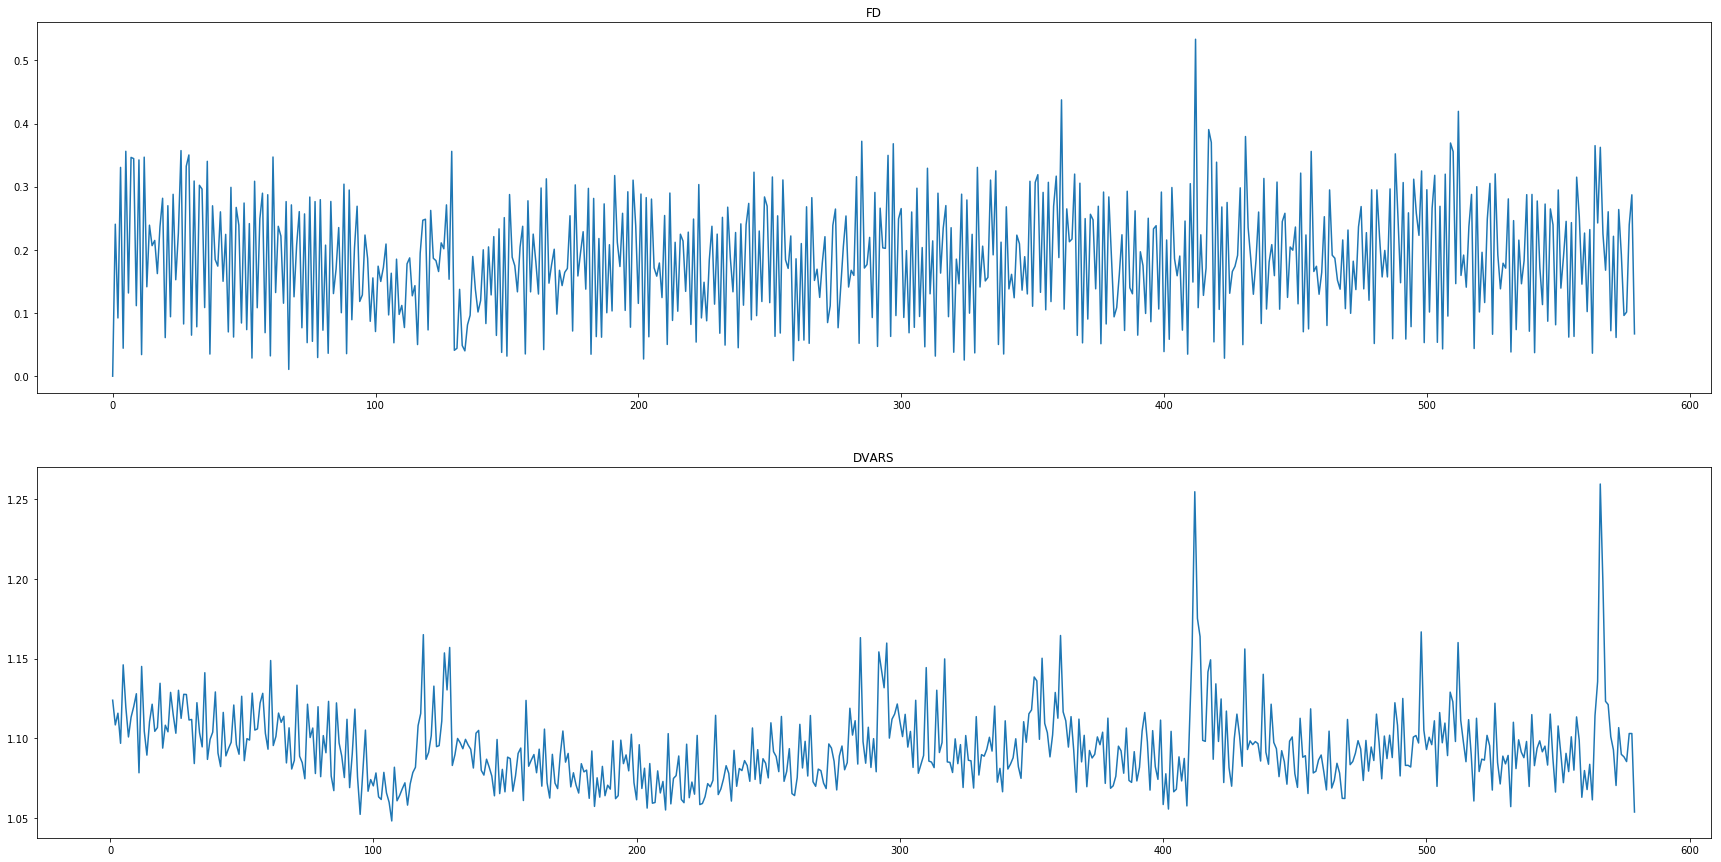

In [7]:
import matplotlib.pyplot as plt
#df[:,2]
#plt.set_size_inches(18.5, 10.5)
#plt.ylim(-1,2)
plt.figure(figsize=(30,15))
plt.subplot(211)
plt.title("FD")
plt.plot(df[:,2])
plt.subplot(212)
plt.title("DVARS")
plt.plot(df[:,3])
plt.show()

In [35]:
# writing the actual scrubbing method in which we will eventually add a column of 0 or 1 for scrubbing. (1 = this TR should be scrubbed)
def scrubb(param, FDvalue, dvarValue):
    # take parameter array
    fd = param[:,2] # take only FD column
    dvars = param[:,3] # take only DVARS std columns
    # extract DVARS and FD
    # run through all TRs and check for changes
    x = [] # empty array
    for i in fd:
        if i>=FDvalue:
            print ("FD outlier")
            x.append(1)
        else:
            x.append(0)     
    for z,n in enumerate(dvars):
        if n >= dvarValue:
            print ("DVARS outlier")
            x[z]=1
        else:
            if x[z]==0:
                x[z]=0
            else:
                x[z] = 1
    # create a vector of 0 or 1
    # return full array with added column
    print(np.array(x).shape)
    print (x)
    print(param.shape)
    fullParam = np.array(param)
    fullParam = np.column_stack([param, x])

    return fullParam

In [49]:
h = scrubb(df, 0.5, 1.2)

FD outlier
DVARS outlier
DVARS outlier
(580,)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
h[:10,:]

array([[ 5.57858376e+03,  4.14514324e+03,  0.00000000e+00,
                    nan,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 5.50460169e+03,  4.14268949e+03,  2.40596130e-01,
         1.12392700e+00,  2.92124719e-02, -1.59745062e-02,
         1.69311303e-02, -6.73501733e-02,  2.42965054e-02,
        -5.17694905e-02, -3.28654000e-02,  7.86297000e-02,
         8.27408000e-02, -1.96546000e-04, -6.80487000e-04,
        -5.01716000e-05,  0.00000000e+00],
       [ 5.47830036e+03,  4.14940693e+03,  9.21943800e-02,
         1.10841100e+00,  2.49386703e-02, -4.45241670e-02,
        -2.80125980e-03,  1.92615168e-02, -1.06188008e-02,
        -2.53561600e-02, -3.00197000e-02,  1.12287000e-01,
         9.82375000e-02, -7.12041000e-04, -6.14126000e-04,
         1.71866000e-04,  0.0